In [1]:
suppressMessages(library(spatialLIBD))
suppressMessages(library(ggplot2))
suppressMessages(library(cowplot))
suppressMessages(library(dplyr))
suppressMessages(library(patchwork))
suppressMessages(library(tidyr))

In [2]:
## Download the spot-level data
spe <- fetch_data(type = "spe")

snapshotDate(): 2021-10-19

2023-02-21 17:37:44 loading file /home/rs619065/.cache/R/BiocFileCache/3371ad55b506f9_Human_DLPFC_Visium_processedData_sce_scran_spatialLIBD.Rdata%3Fdl%3D1



In [3]:
df_spatial1 <- as.data.frame(spatialCoords(spe))
df_spatial2 <- as.data.frame(spatialData(spe))
rownames(df_spatial1) <- stringr::str_replace_all(rownames(df_spatial1), "\\.", "-")

In [4]:
df_metadata <- as.data.frame(colData(spe))

In [5]:
df <- cbind(df_spatial1, df_spatial2, df_metadata) %>%
    drop_na()

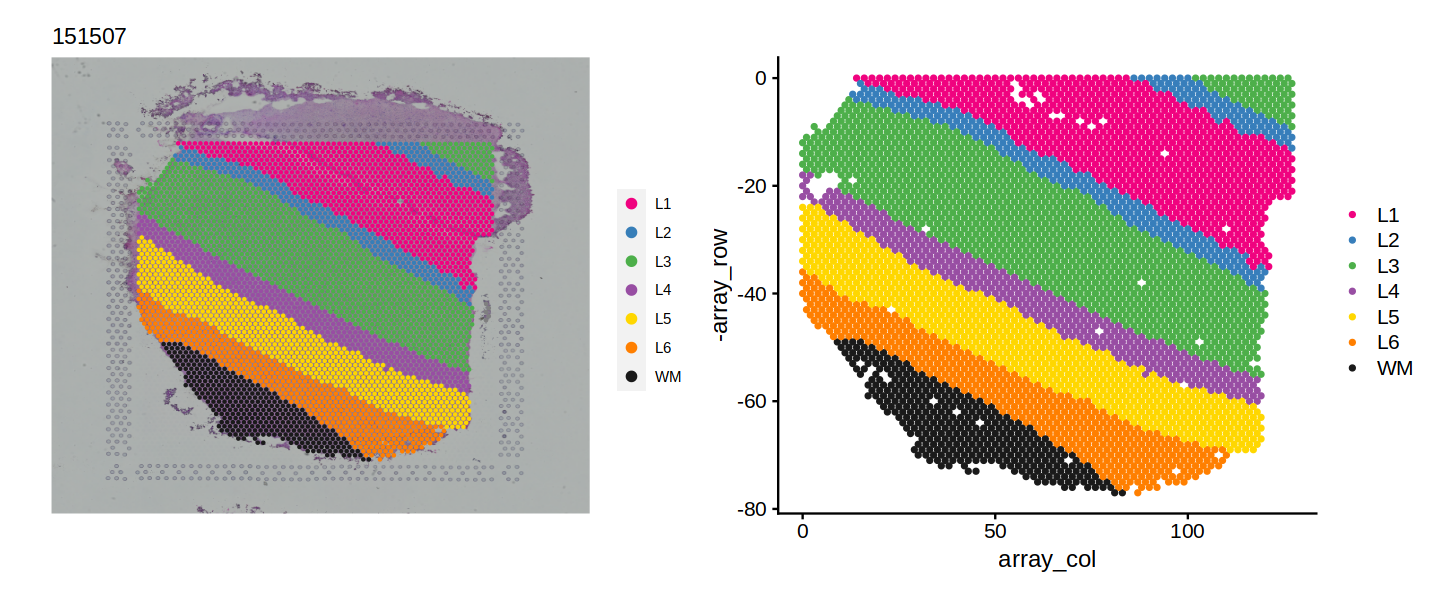

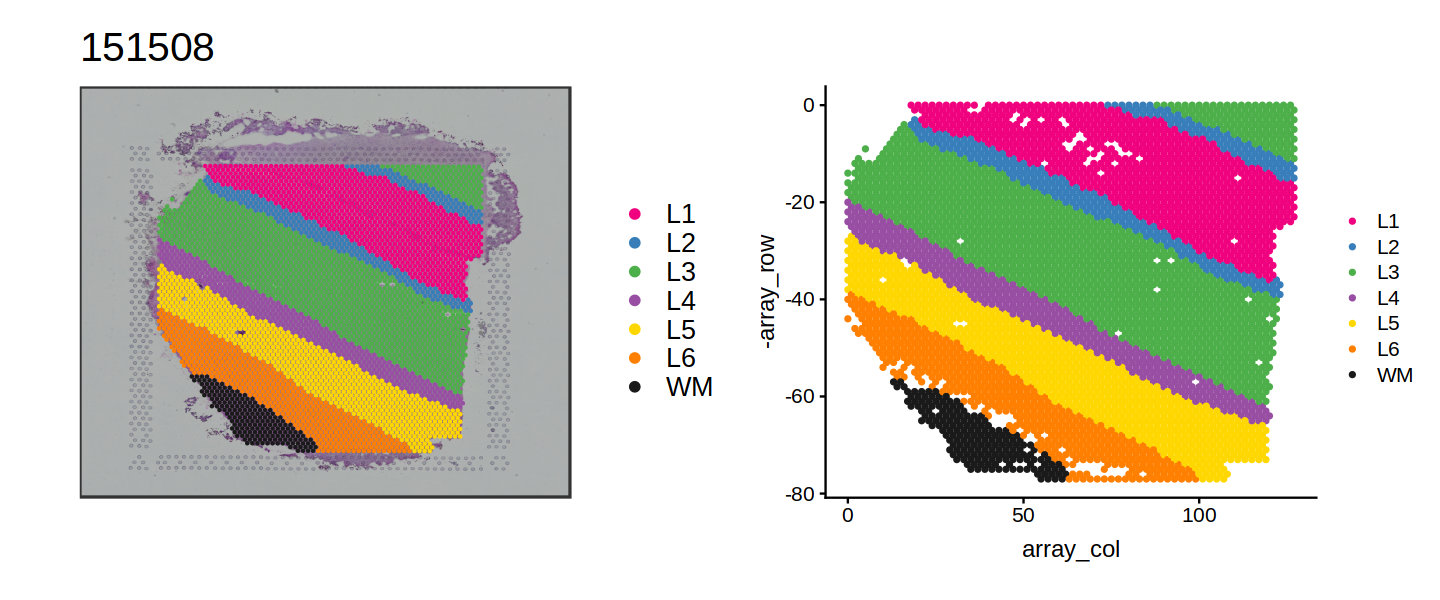

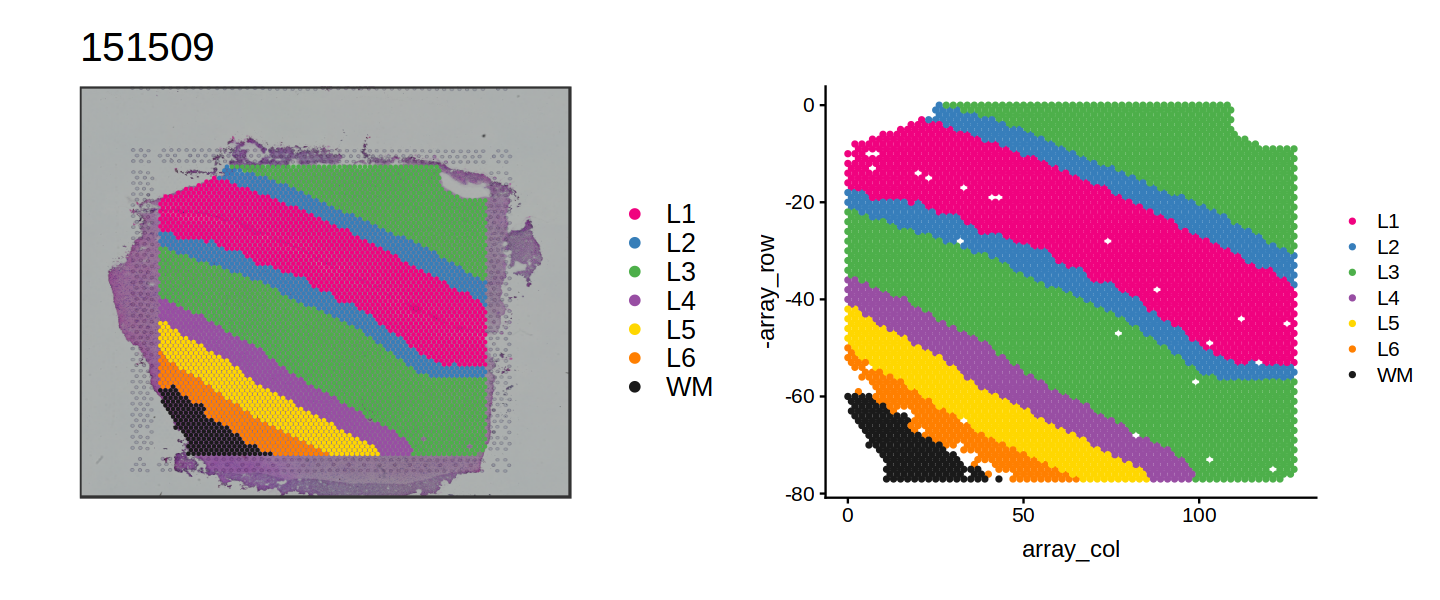

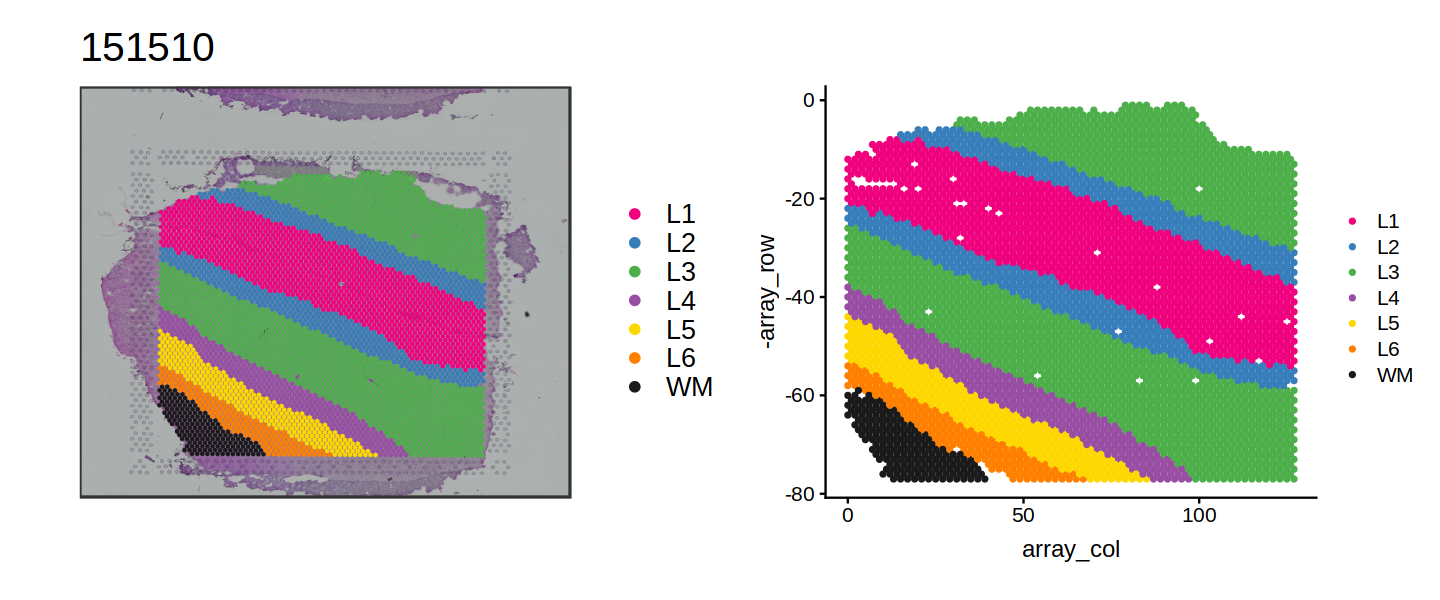

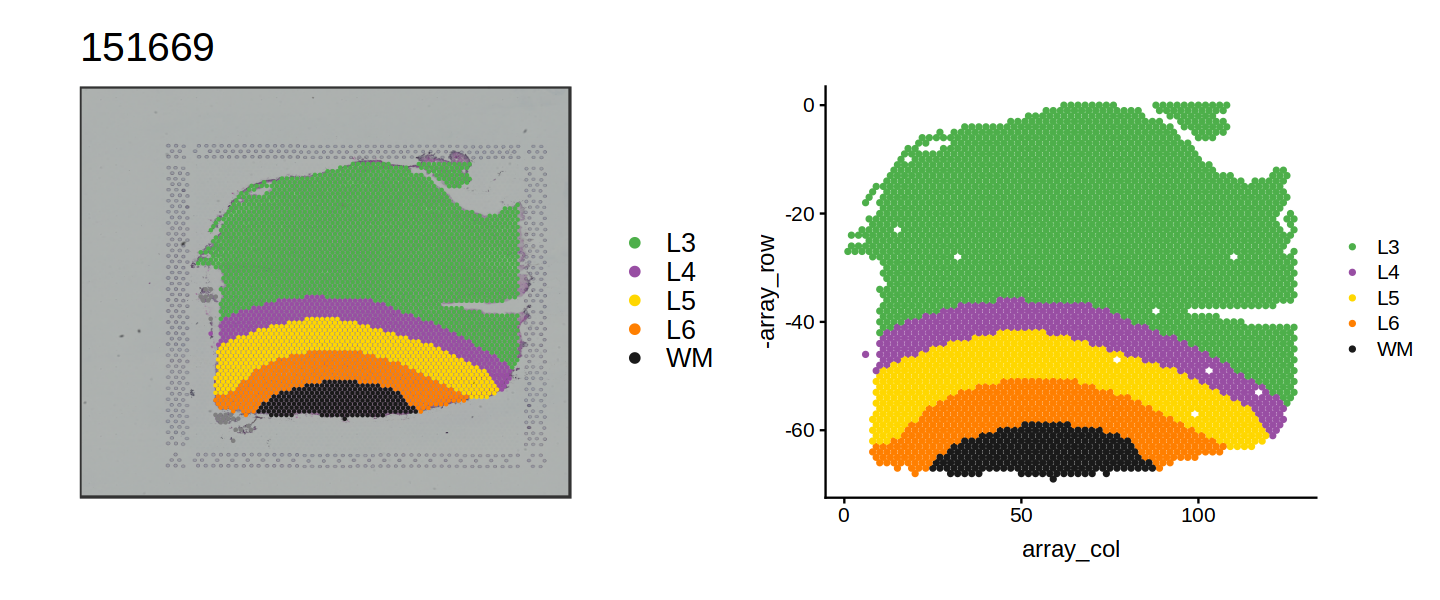

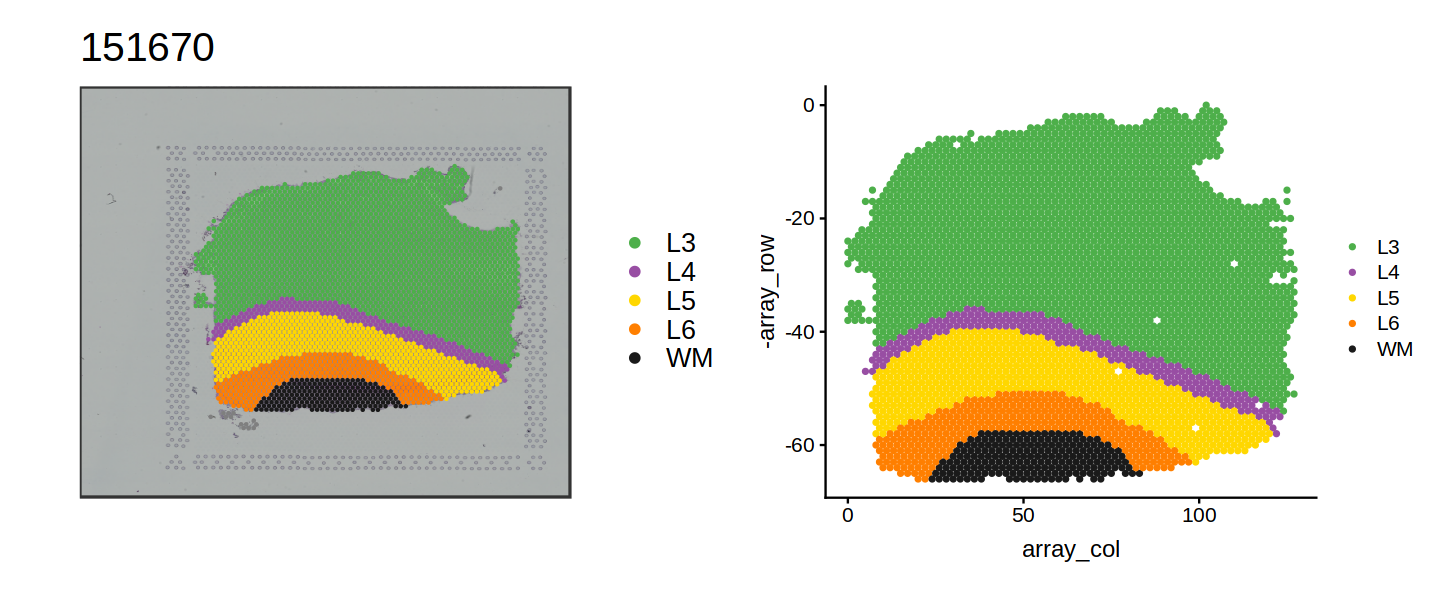

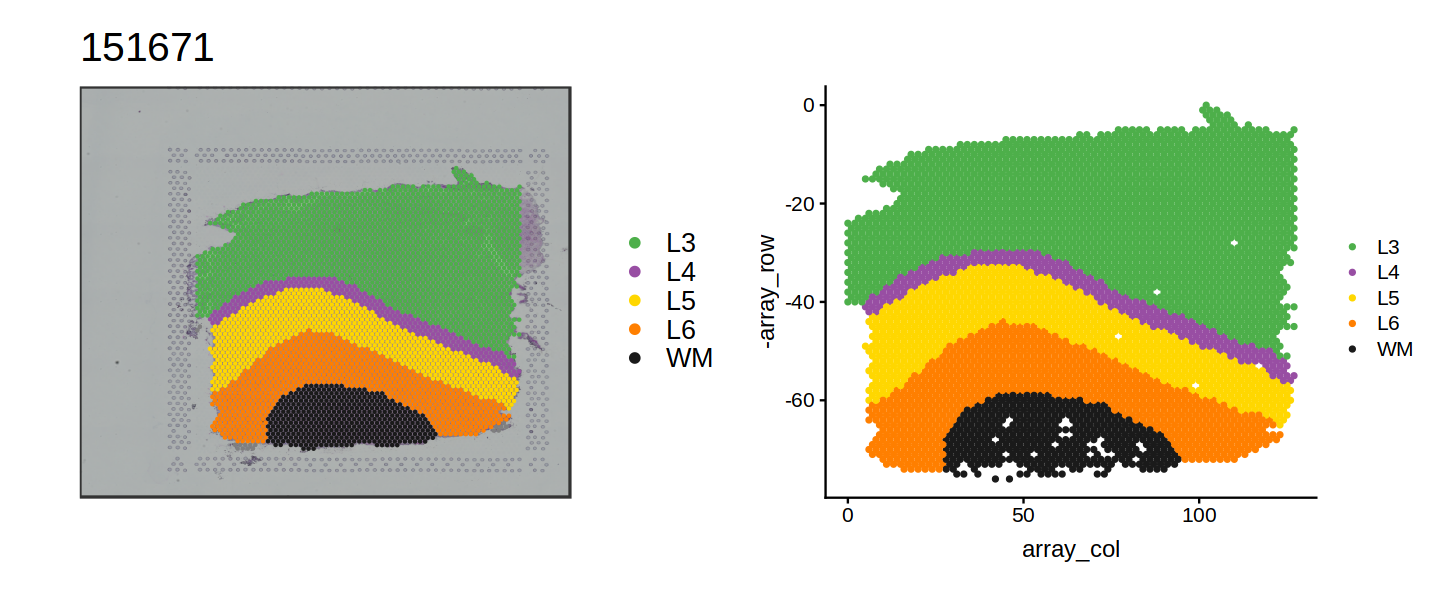

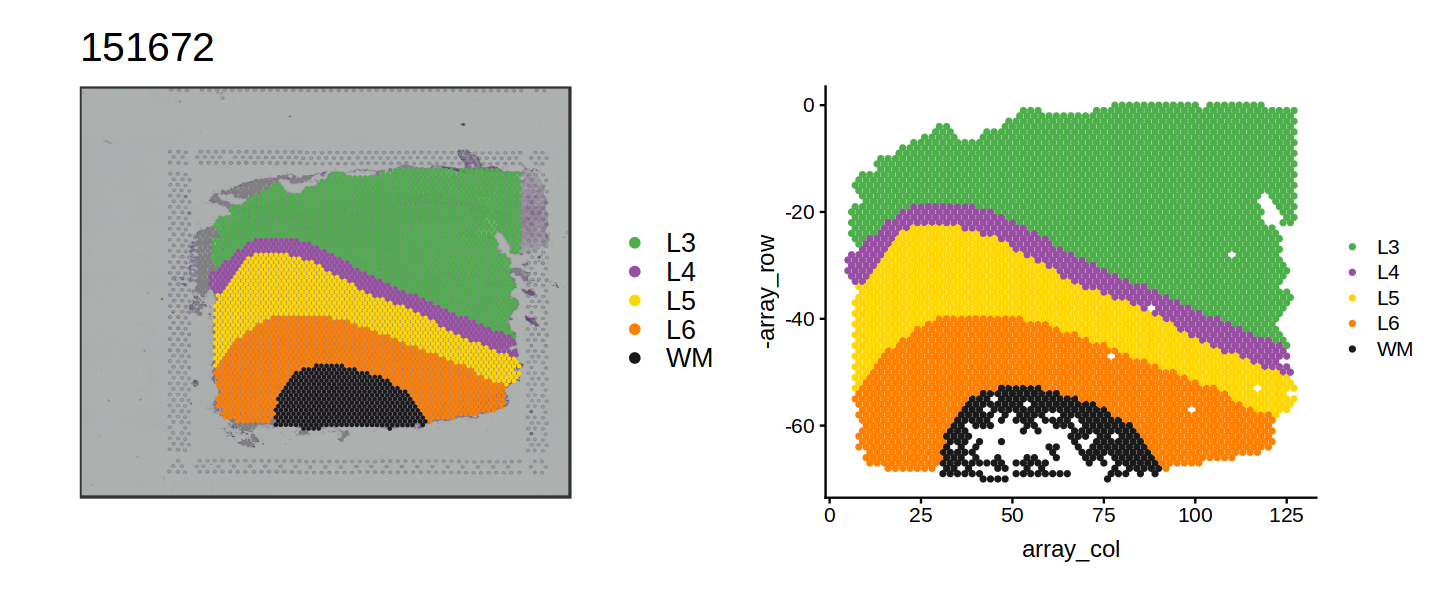

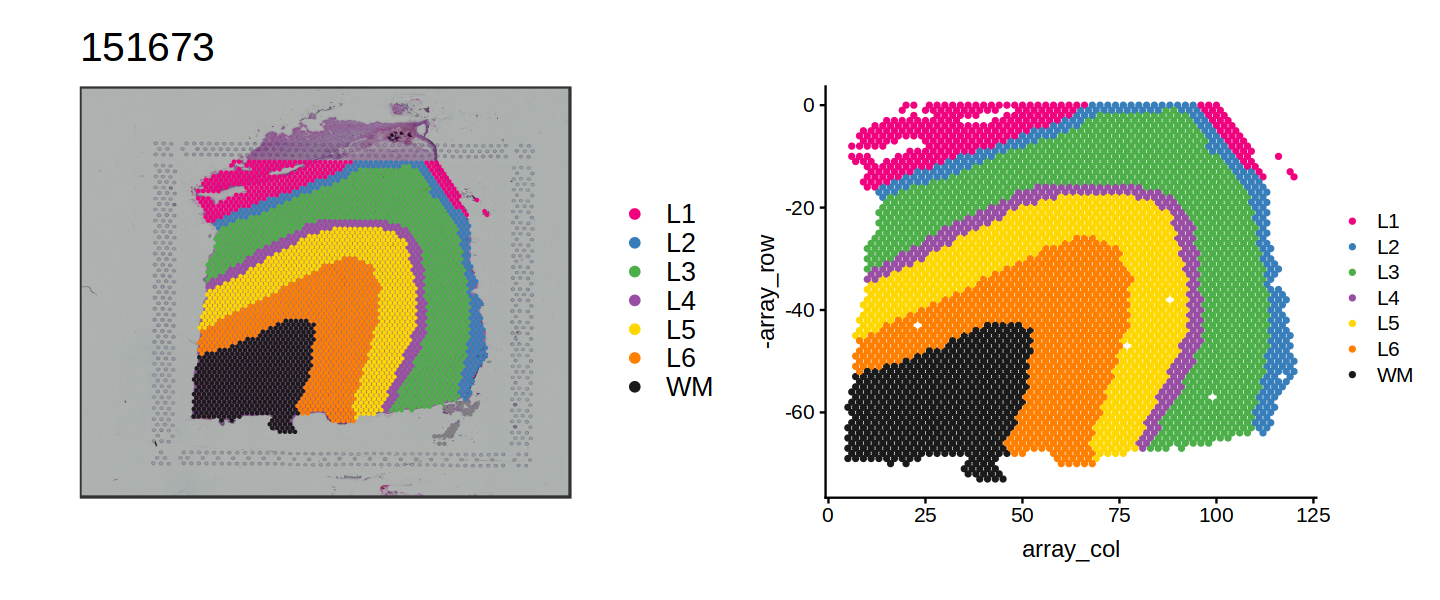

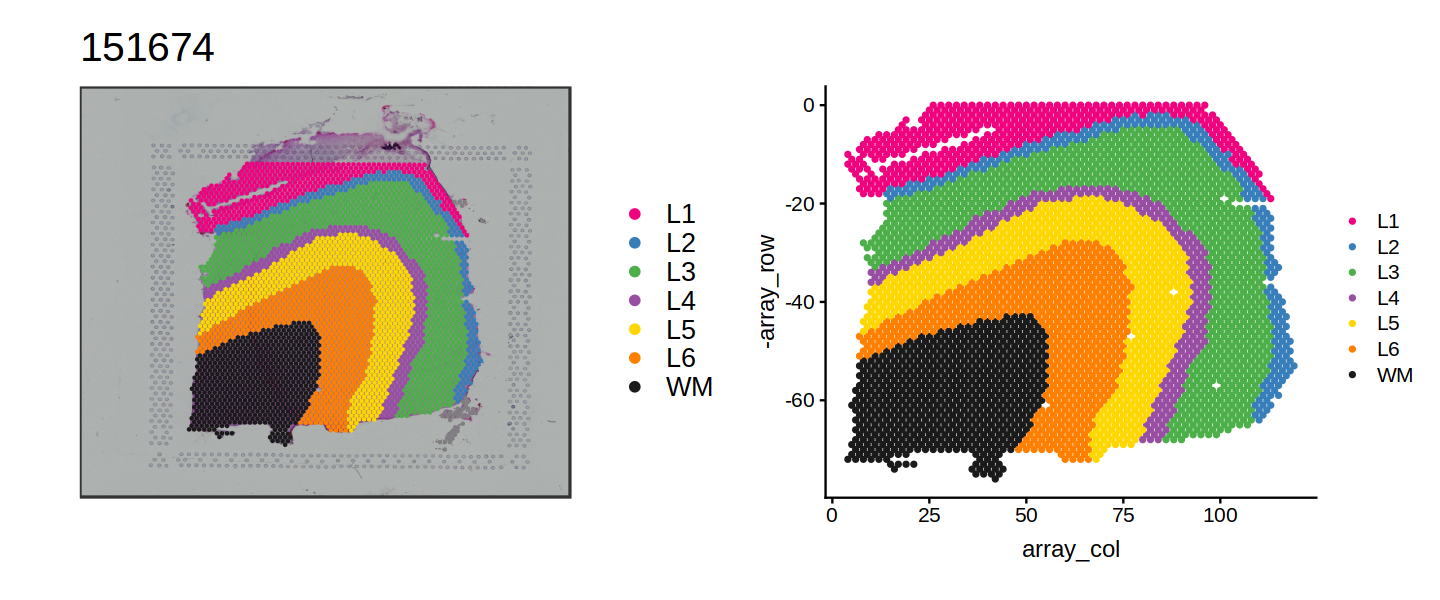

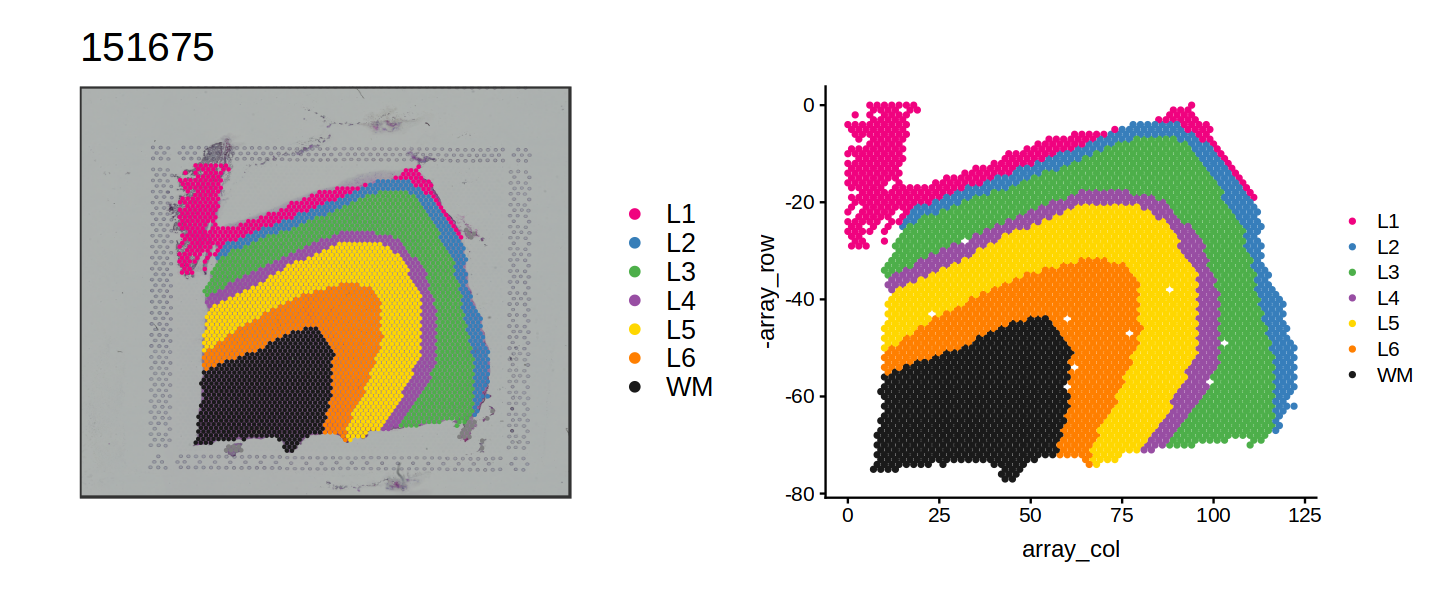

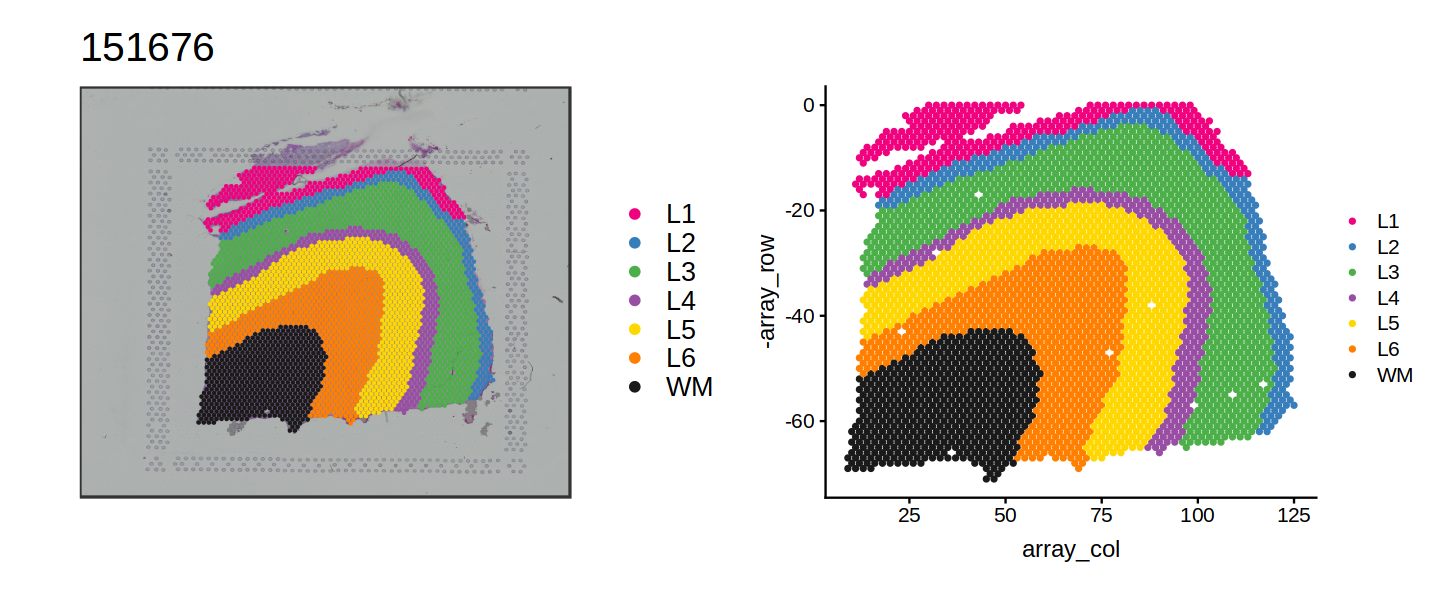

In [6]:
options(repr.plot.height = 5, repr.plot.width = 12)

layer_cols = c("L1" = "#F0027F", 
               "L2" = "#377EBB", 
               "L3" = "#4DAF4A", 
               "L4" = "#984EA3",
              "L5" = "#FFD700",
              "L6" = "#FF7F00",
              "WM" = "#1A1A1A")

for(sample in unique(df_metadata$sample_id)){
    p1 <- vis_clus(
    spe = spe,
    clustervar = "spatialLIBD",
    sampleid = sample,
    colors = libd_layer_colors,
        point_size = 1
    )
    
    p2 <- df %>%
        subset(sample_id == sample & discard == FALSE) %>%
        ggplot(aes(x = array_col, y = -array_row, color = spatialLIBD)) +
        scale_color_manual(values = layer_cols) +
        geom_point(size = 1) +
        theme_cowplot() +
        theme(legend.title = element_blank())
    
    print(p1 + p2)
    
}

In [7]:
# save metadata with spatial coordinates
write.csv(df, "human_brain.csv")

In [9]:
saveRDS(spe, "human_brain.rds")